In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up matplotlib to display plots inline
%matplotlib inline


# Data Representation

In [5]:
df = df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**RowNumber**: Index of the row.

**CustomerId**: Unique identifier for each customer.

**Surname**: Customer's last name (may not be very useful for analysis).

**CreditScore**: The credit score of the customer [300 : 850].
   * Poor credit: 300 to 579.
   * Fair credit: 580 to 669.
   * Good credit: 670 to 739.
   * Very good credit: 740 to 799.
   * Excellent credit: 800 to 850.

**Geography**: Country of the customer (e.g., France, Spain).

**Gender**: Gender of the customer (e.g., Male, Female).

**Age**: Age of the customer.

**Tenure**: Number of years the customer has been with the bank.

**Balance**: Account balance of the customer.

**NumOfProducts**: Number of products the customer has purchased.

**HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).

**IsActiveMember**: Whether the customer is an active member (1 = Yes, 0 = No).

**EstimatedSalary**: Estimated annual salary of the customer.

**Exited**: Whether the customer left the bank (1 = Yes, 0 = No) — this is likely the target for churn prediction.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Wrangling

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check outliers**

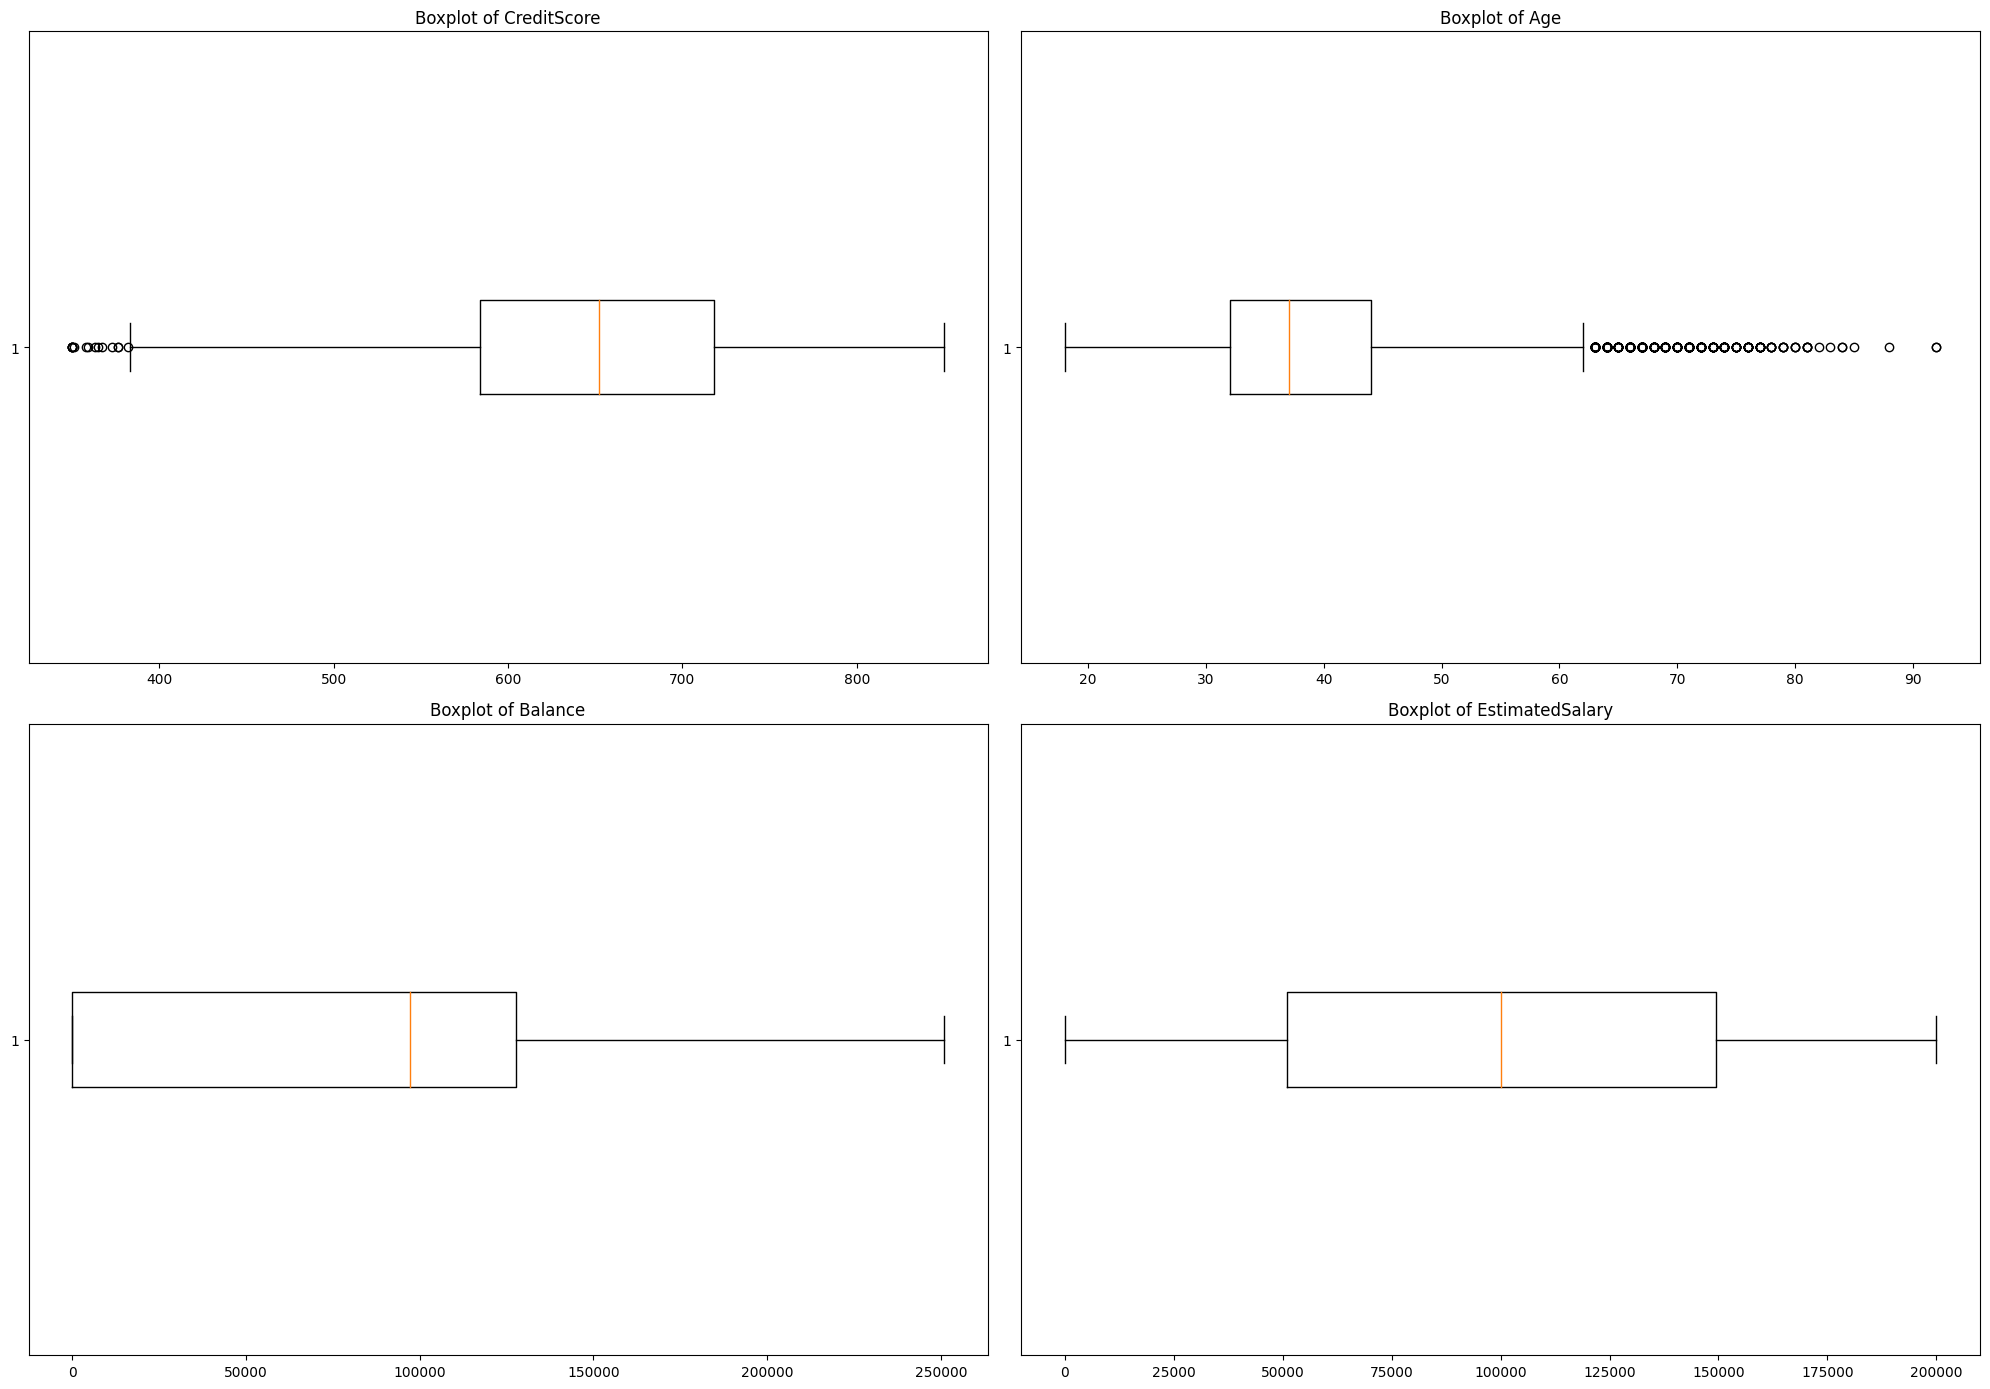

In [10]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(20, 14))
for i, feature in enumerate(numerical_features,1):
    plt.subplot(2,2,i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# **Exploratory Data Analysis**

# Univariate analysis

In [11]:
df['CreditScore'].describe() #the credit score column

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<ipython-input-12-82e81fa5e32b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


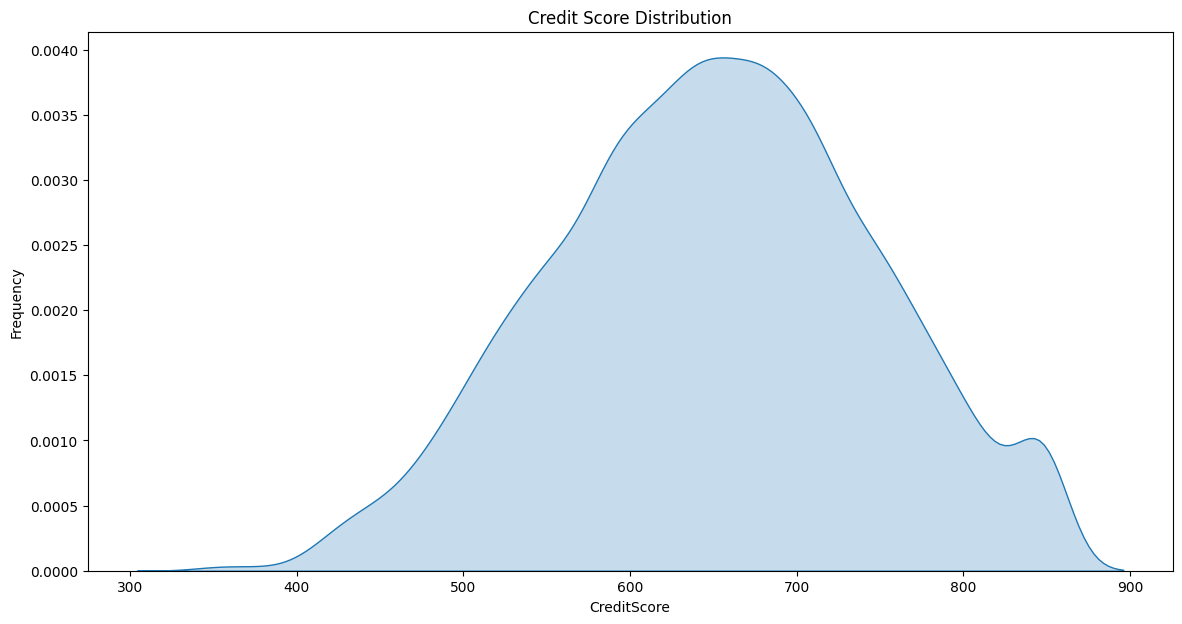

In [12]:
plt.figure(figsize=(14, 7))

sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()

the data is likely **symmetrically distributed** with **little skewness**.

In [13]:
df["Geography"].value_counts()# Geography column

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
counts_of_Geography = df["Geography"].value_counts()# Geography column

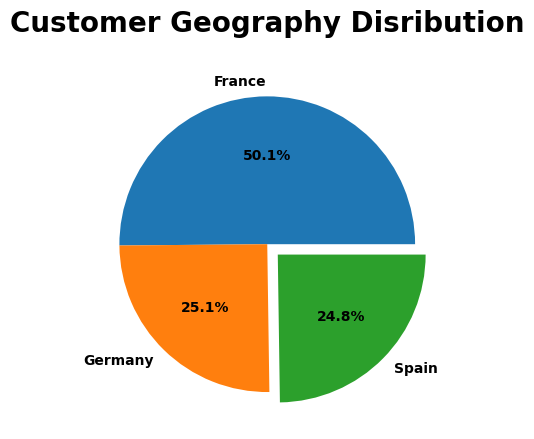

In [15]:
plt.subplot(1,1,1)
plt.pie(counts_of_Geography.values, labels=counts_of_Geography.index, autopct="%1.1f%%",colors=sns.set_palette("Set3"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.show()

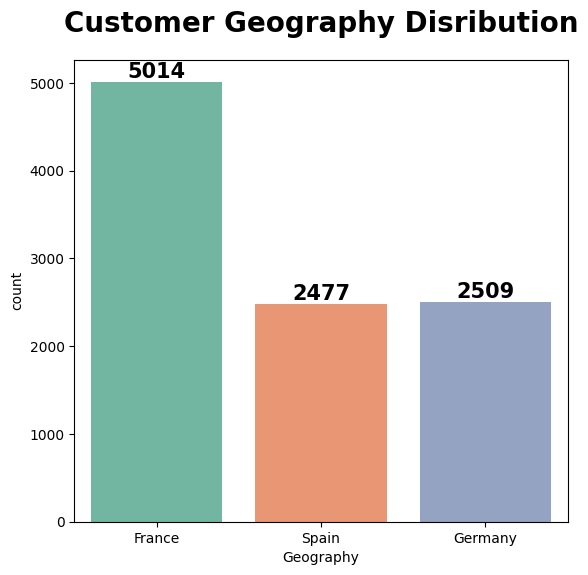

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.show()

In [17]:
count = df["Gender"].value_counts() #Gender Column

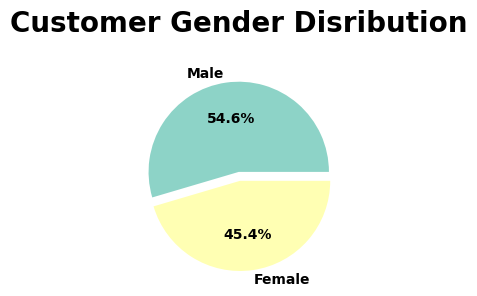

In [18]:
plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set3"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()

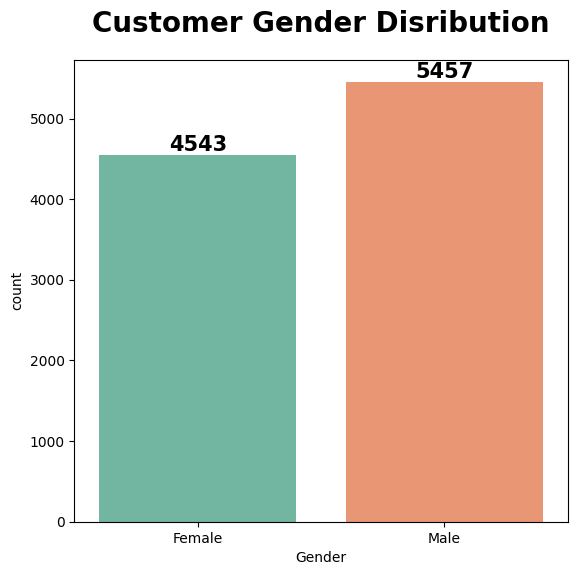

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()

In [20]:
df["Age"].describe() #Age Column

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<ipython-input-21-ac45c57daad1>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Age'], fill=True, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


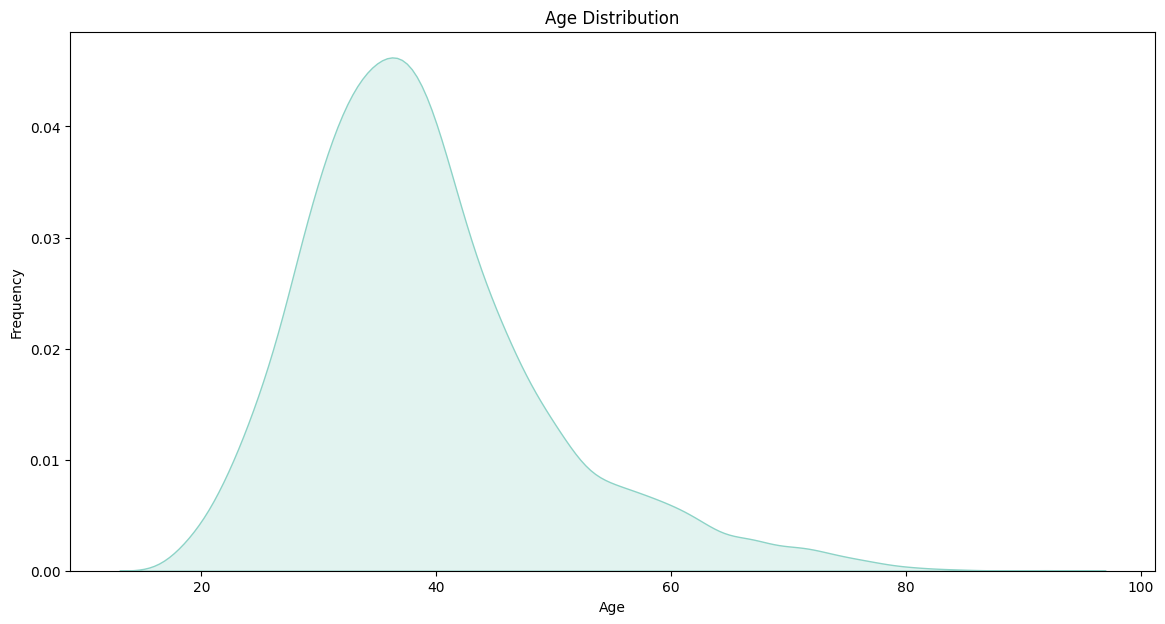

In [21]:
plt.figure(figsize=(14, 7))

sns.kdeplot(df['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [22]:
df["Tenure"].value_counts()#tenure column مدة الخدمة

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [23]:
counts=df["Tenure"].value_counts()

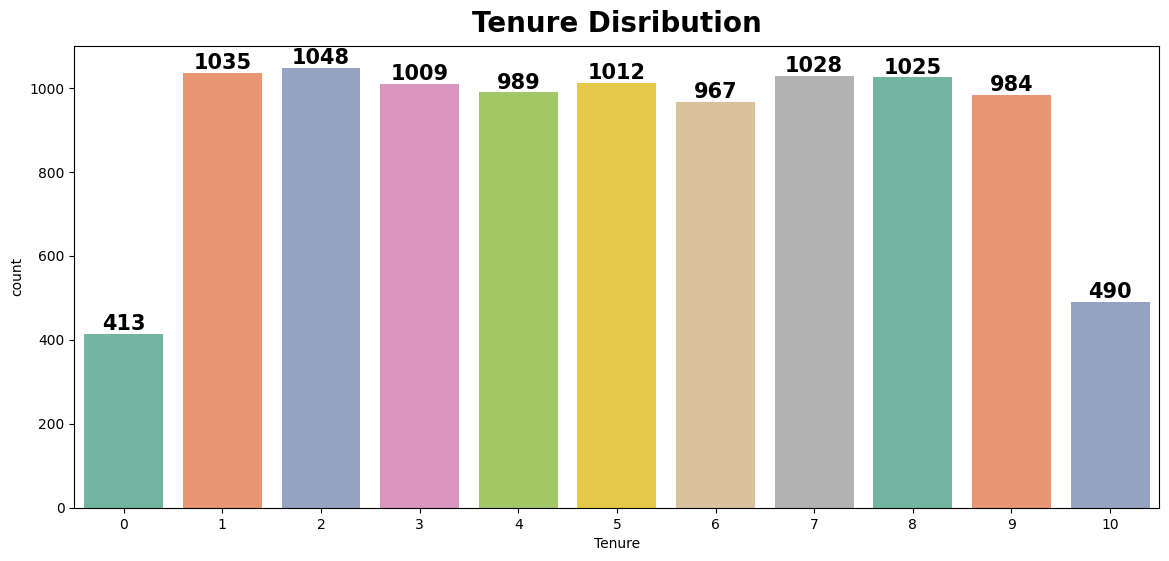

In [24]:
plt.figure(figsize=(14,6))

ax=sns.countplot(data=df, x="Tenure",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Tenure Disribution",fontweight="black",size=20,pad=10)

plt.show()

In [25]:
df["Balance"].describe()#balance column

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<ipython-input-26-57a346f6f840>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Balance'], fill=True, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


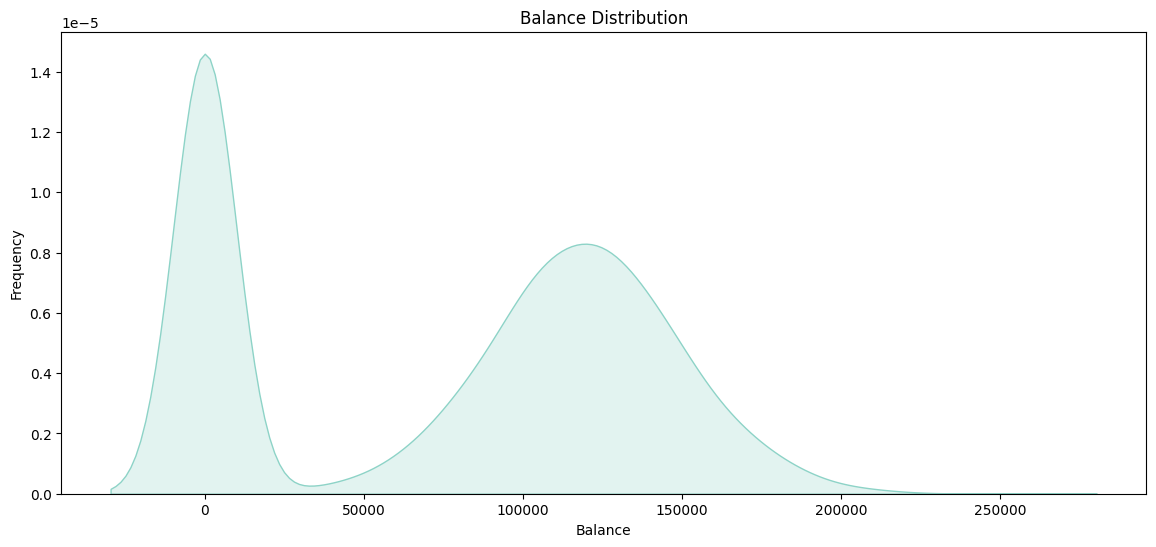

In [26]:
plt.figure(figsize=(14, 6))

sns.kdeplot(df['Balance'], fill=True, palette="Set2")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

Some customers have zero balance, which might need investigation

In [27]:
df["NumOfProducts"].value_counts() #Number of products column

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [28]:
counts=df["NumOfProducts"].value_counts()

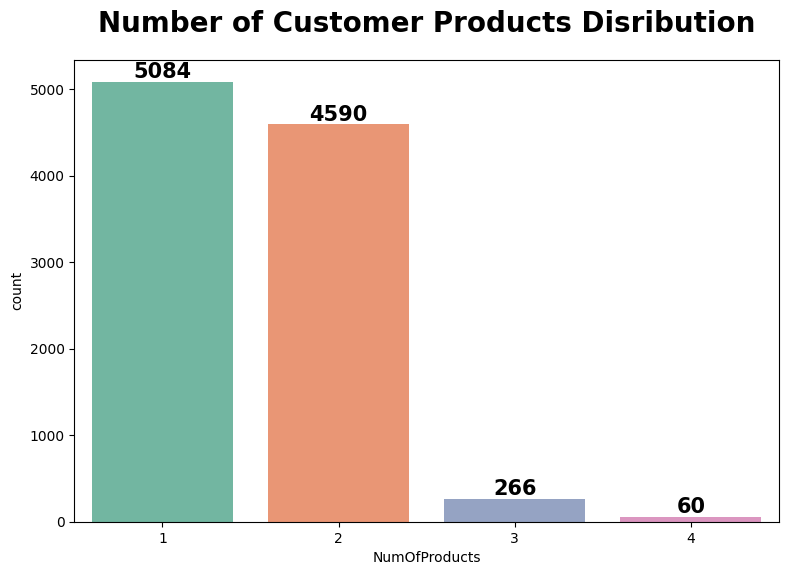

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Number of Customer Products Disribution",fontweight="black",size=20,pad=20)

plt.show()

In [30]:
df['EstimatedSalary'].describe() #Estimated salary column

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<ipython-input-31-e622c9eab243>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


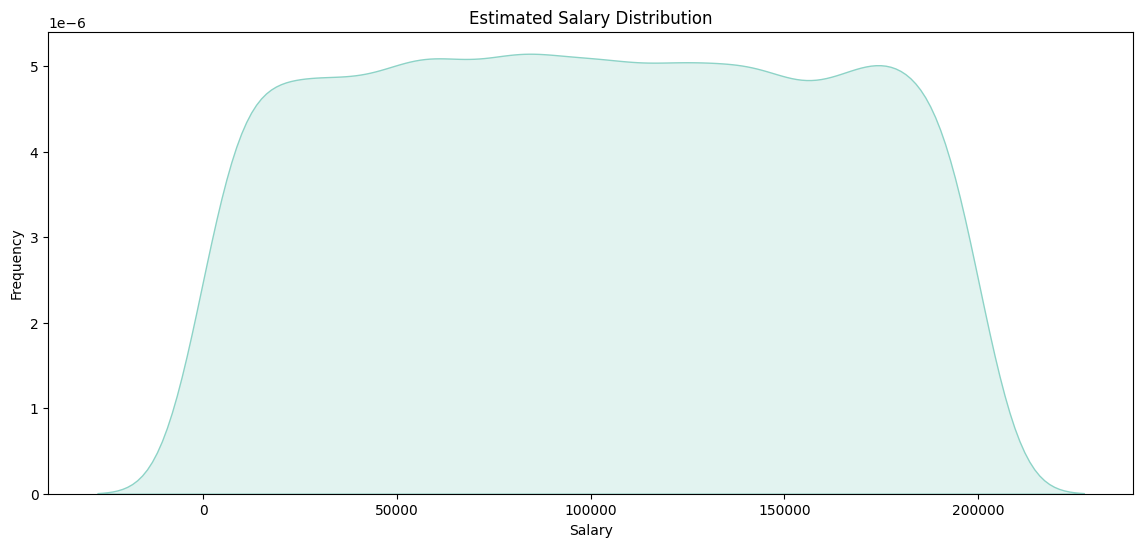

In [31]:
plt.figure(figsize=(14, 6))

sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

In [32]:
df["Exited"].value_counts() #Exited column

Exited
0    7963
1    2037
Name: count, dtype: int64

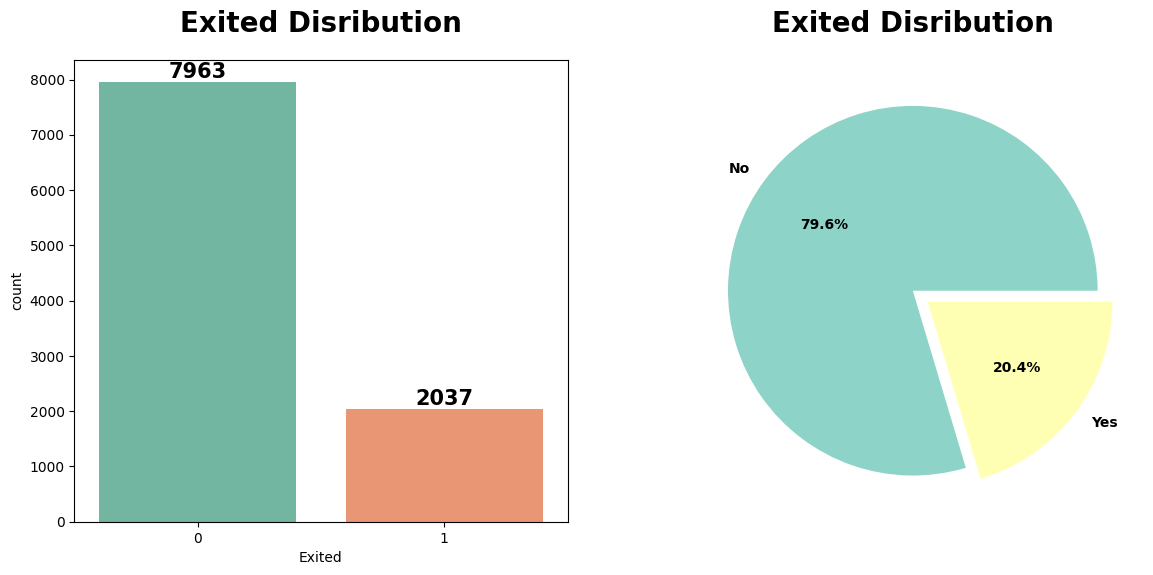

In [33]:
count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Exited",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Exited Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Exited Disribution",fontweight="black",size=20,pad=20)


plt.show()

# Bivariate Analysis

**Numerical Features vs. Churn (Exited)**

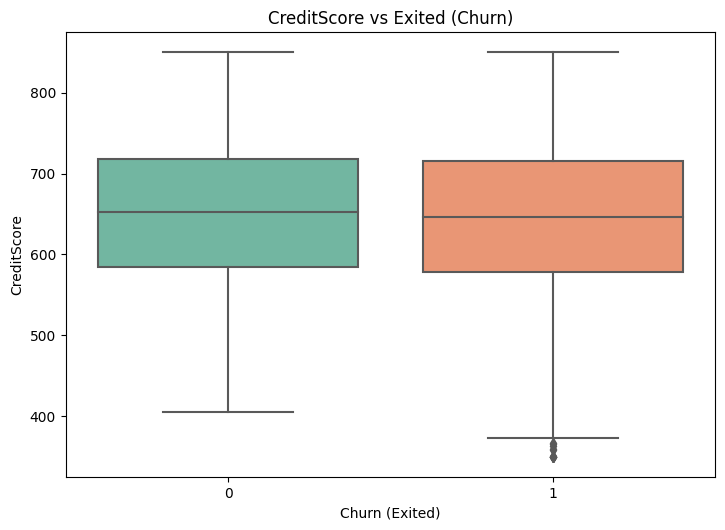

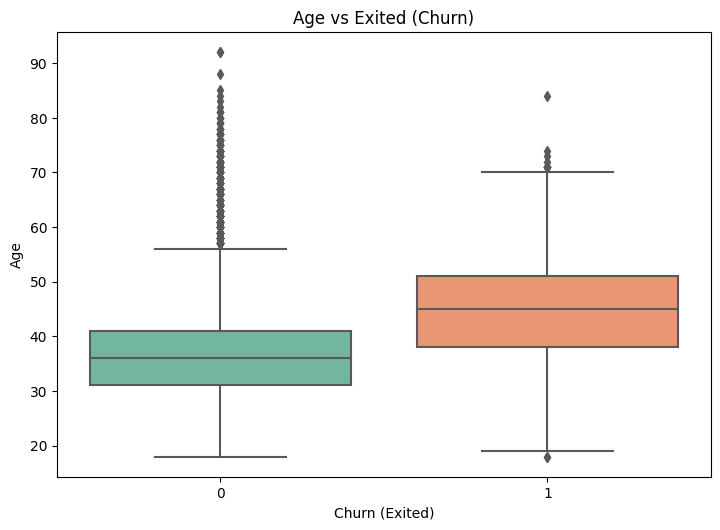

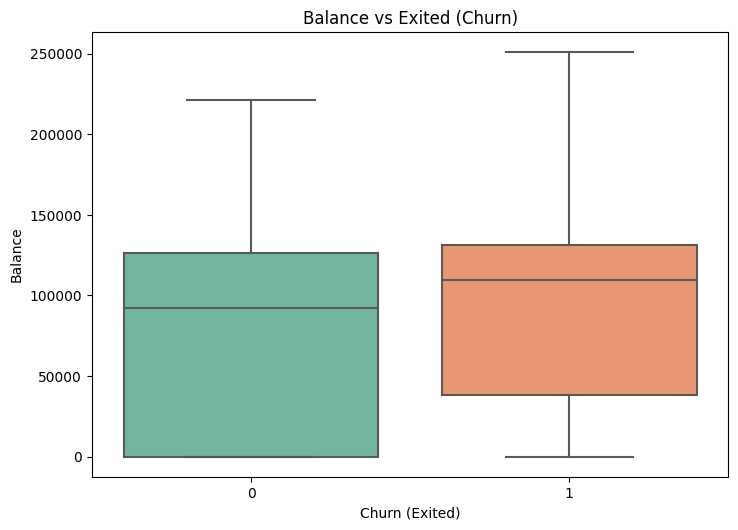

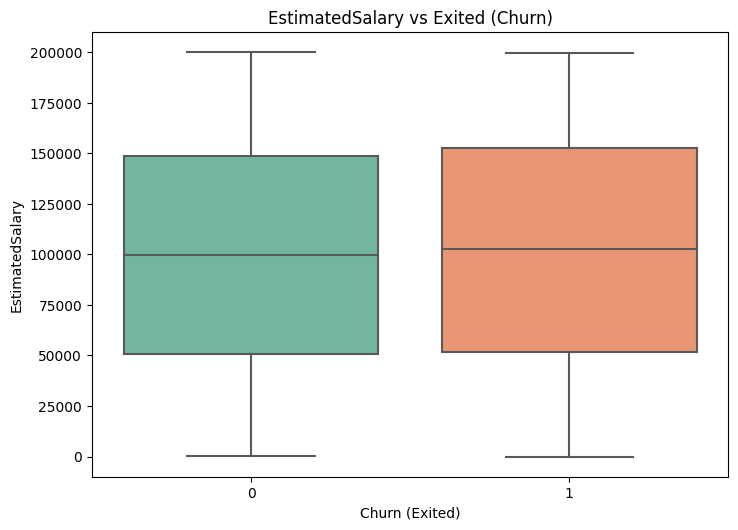

In [34]:
# List of numerical features to analyze
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
for i, feature in enumerate(numerical_features, 1):
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

**Categorical Features vs. Churn (Exited)**

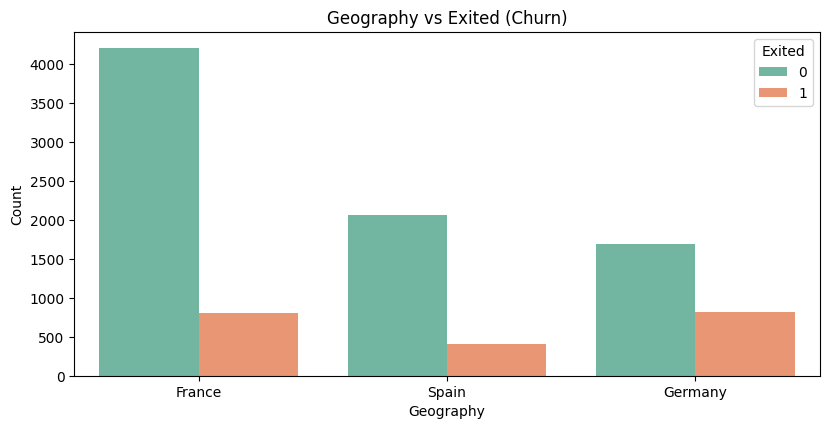

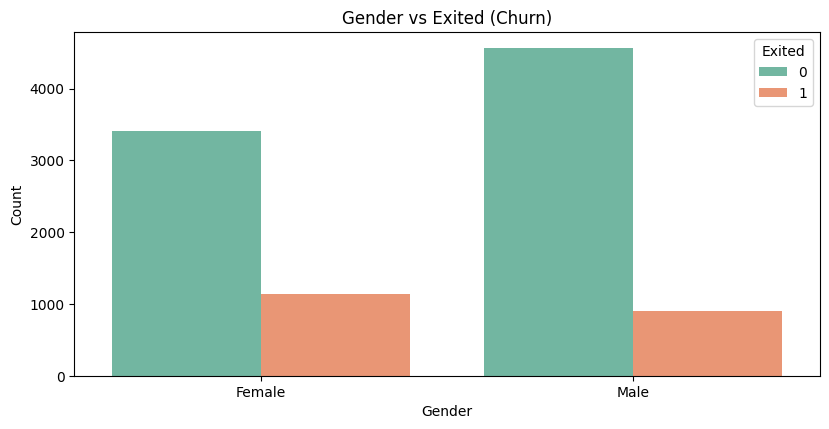

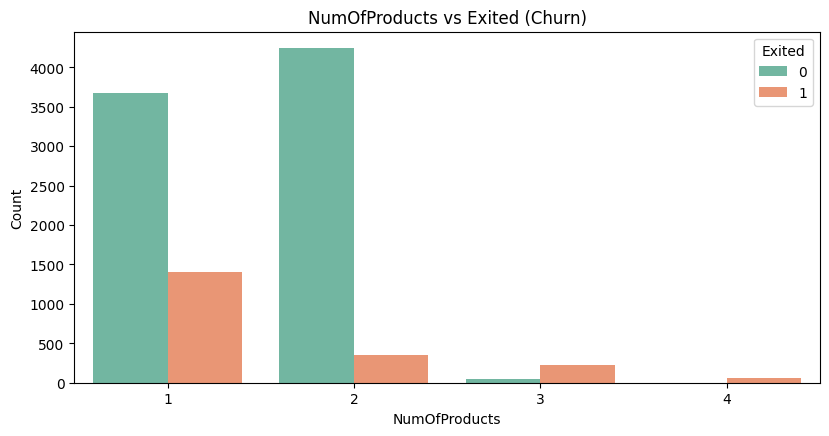

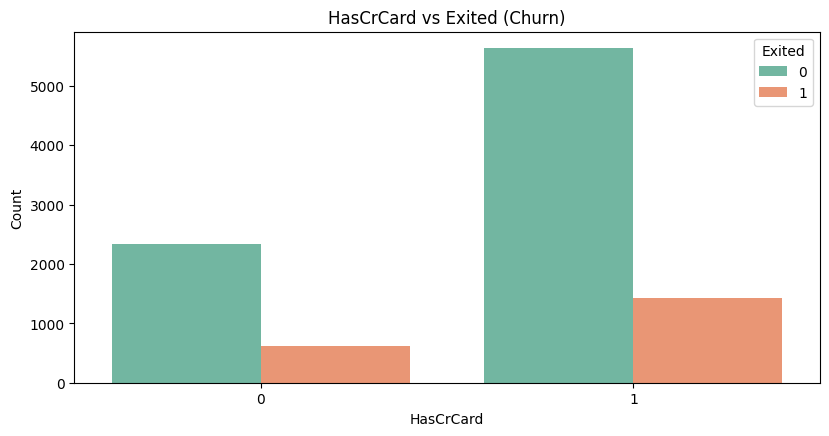

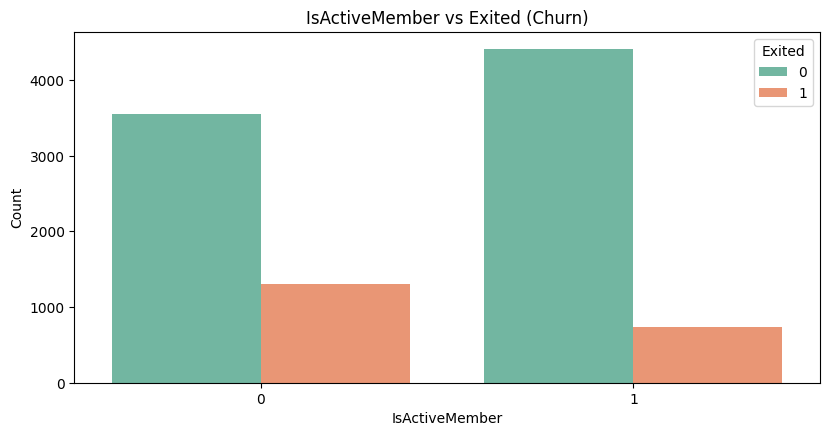

In [35]:
# List of categorical features to analyze
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Plotting the relationship between each categorical feature and churn (Exited)
for i, feature in enumerate(categorical_features, 1):
    plt.figure(figsize=(16, 12))
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Multivariate Analysis

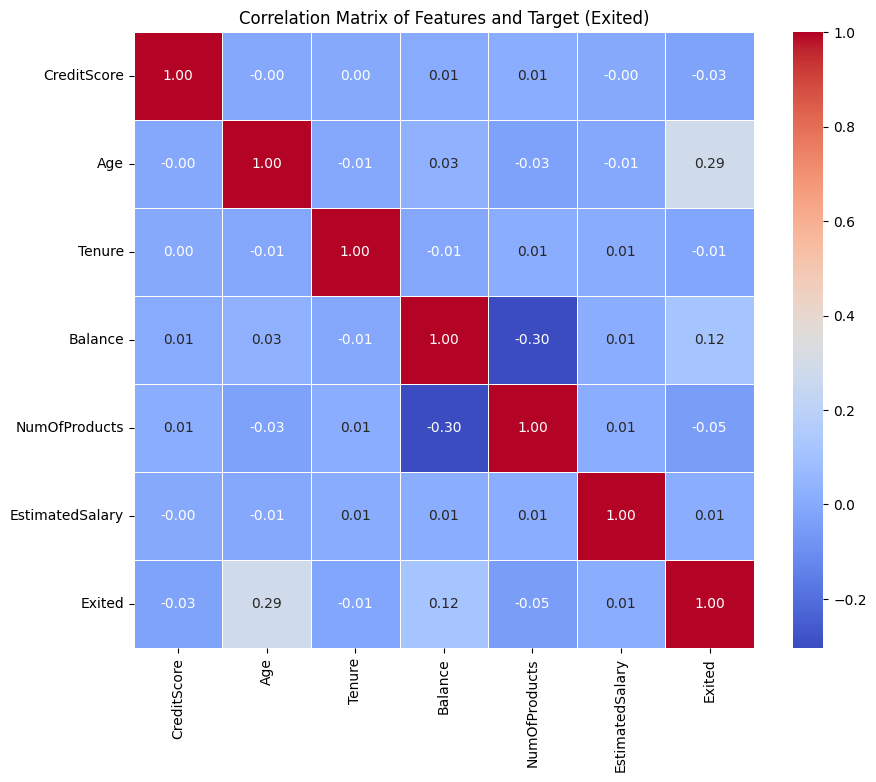

In [36]:
# Include the target 'Exited' and numerical features for correlation analysis
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# Compute the correlation matrix
correlation_matrix = df[numerical_features_with_target].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

# Key Findings
* **Churn Distribution**: Approximately 20% of customers churned, indicating an imbalanced dataset.
* **Demographic Insights**:
  * Age: Older customers are more likely to churn.
  * Geography: Customers from Germany have the highest churn rate.
  * Gender: Females have a slightly higher churn rate than males.
* **Financial Insight**s:
  * Credit Score: Lower credit scores correlate with higher churn.
  * Balance: Customers with higher balances are more likely to churn.
  * Estimated Salary: No significant correlation with churn.
* **Behavioral Insights**:
  * Active Membership: Inactive members have a higher churn rate.